<a href="https://colab.research.google.com/github/charmzshab/30-Days-of-Python/blob/master/colabtomatodisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training Deep Learning Models In Google Colab**

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 44kB/s 


In [2]:
!nvidia-smi 

Fri Apr  9 08:22:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/new_plant_diseases_dataset/train'
valid_path = '/content/drive/MyDrive/new_plant_diseases_dataset/valid'

In [6]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/new_plant_diseases_dataset/train/*')

In [9]:
folders

['/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___healthy',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Early_blight',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/new_plant_diseases_dataset/train/Tomato___Late_blight']

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
# use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# make sure you provide the same target size as initialised for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/new_plant_diseases_dataset/train',
                                                 target_size = (224,224),
                                                 batch_size=16,
                                                 class_mode = 'categorical')

Found 18474 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/new_plant_diseases_dataset/valid',
                                                 target_size = (224,224),
                                                 batch_size=16,
                                                 class_mode = 'categorical')

Found 4695 images belonging to 10 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1155/1155 [==============================] - 9002s 8s/step - loss: 4.7332 - accuracy: 0.5926 - val_loss: 3.4519 - val_accuracy: 0.7604
Epoch 2/10
1155/1155 [==============================] - 329s 284ms/step - loss: 3.1849 - accuracy: 0.7884 - val_loss: 2.7913 - val_accuracy: 0.8179
Epoch 3/10
1155/1155 [==============================] - 331s 286ms/step - loss: 3.2475 - accuracy: 0.8146 - val_loss: 3.0074 - val_accuracy: 0.8307
Epoch 4/10
1155/1155 [==============================] - 330s 286ms/step - loss: 2.9251 - accuracy: 0.8393 - val_loss: 5.5162 - val_accuracy: 0.7876
Epoch 5/10
1155/1155 [==============================] - 331s 286ms/step - loss: 2.9124 - accuracy: 0.8550 - val_loss: 2.9948 - val_accuracy: 0.8571
Epoch 6/10
1155/1155 [==============================] - 328s 284ms/step - loss: 2.6737 - accuracy: 0.8688 - val_loss: 4.6781 - val_accuracy: 0.8215
Epoch 7/10
1155/1155 [==============================] - 330s 286ms/step - loss: 2.5116 - accuracy: 0.8800 - val_lo

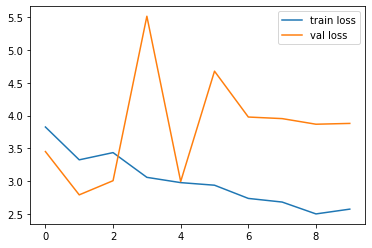

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')